Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


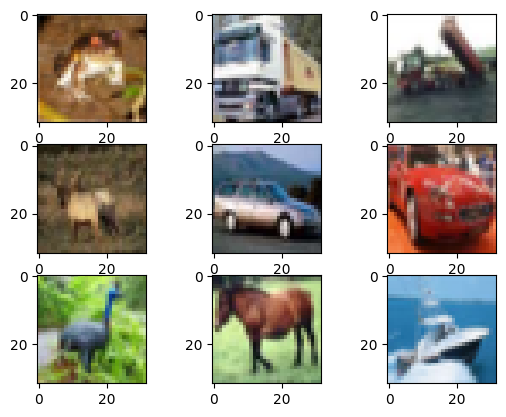

In [16]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [49]:
# starting hw3 tensorflow resources: https://www.tensorflow.org/tutorials/images/cnn

# import libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.models import Model



In [62]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [63]:
# getting fammiliar with dataset
# Dataset size
print("Training set size:", train_images.shape)
print("Test set size:", test_images.shape)

# Image size and channels
print("Each image size:", train_images.shape[1:])

# Number of classes
num_classes = len(set(train_labels.flatten()))
print("Number of classes:", num_classes)

# Show first few labels
print("Sample labels:", train_labels[:5])

# number of images per class
unique, counts = np.unique(train_labels, return_counts=True)
print("Train set distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:", dict(zip(unique, counts)))

Training set size: (50000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)
Each image size: (32, 32, 3)
Number of classes: 10
Sample labels: [[6]
 [9]
 [9]
 [4]
 [1]]
Train set distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test set distribution: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


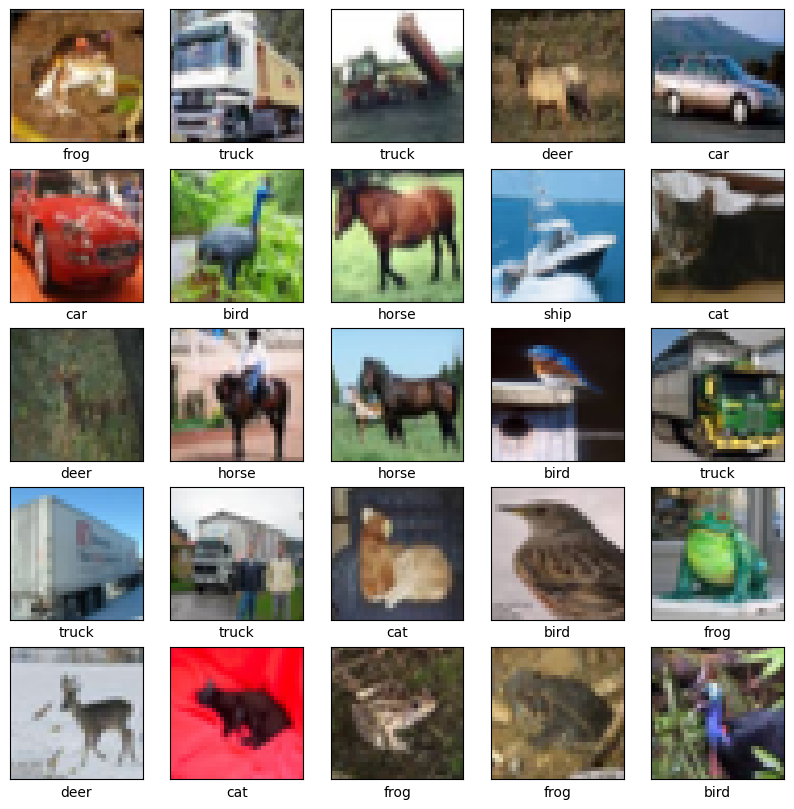

In [64]:
# Visualize a sample of the dataset
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [65]:
# input tensor with input shape (32, kernel size of 3)
input_tensor = tf.keras.Input(shape=(32, 32, 3), dtype=tf.float32)


# Add layers
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)

x = Flatten()(x)

x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_img, outputs=output)


"def create_cnn_model(input_shape):\n    input_tensor = Input(shape=input_shape)\n\n    # Add layers\n    x = Conv2D(32, (3, 3), activation='relu')(input_tensor)\n    x = MaxPooling2D((2, 2))(x)\n    x = Conv2D(64, (3, 3), activation='relu')(x)\n    x = MaxPooling2D((2, 2))(x)\n    x = Conv2D(64, (3, 3), activation='relu')(x)\n\n    x = Flatten()(x)\n    x = Dense(64, activation='relu')(x)\n    output = Dense(10, activation='softmax')(x)\n\n    model = Model(inputs=input_img, outputs=output)\n    return model\n"

In [66]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 10s 6ms/step - loss: 1.4809 - accuracy: 0.4617 - val_loss: 1.1879 - val_accuracy: 0.5722
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1067 - accuracy: 0.6100 - val_loss: 1.0852 - val_accuracy: 0.6192
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9515 - accuracy: 0.6660 - val_loss: 0.9483 - val_accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8469 - accuracy: 0.7044 - val_loss: 0.8939 - val_accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7713 - accuracy: 0.7290 - val_loss: 0.8828 - val_accuracy: 0.6922
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7066 - accuracy: 0.7527 - val_loss: 0.8722 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6542 - accuracy: 0.7699 - val_loss: 0.8664 - val_accuracy: 0.7107
Ep

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_2')>